# Lista de exercícios sobre TensorFlow - Gradiente Descendente

**Disciplina**: Introdução a Redes Neurais Profundas 2018/1  
**Professor**: Jorge Leonid Aching Samatelo

**Aluno**: Marcos A. Spalenza

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

## Sobre os optimizadores de TensorFlow <a name="SobOptTensorFlow"></a>



Os otimizadores incluídos no TensorFlow são todos variações do algoritmo  Gradiente Descente.
Existem muitos outros otimizadores que os pesquisadores usam como *simulated annealing*, gradiente conjugado e *colony optimization*, mas estes tendem a não funcionar bem com Redes Neurais multicamadas ou não paralelizam bem para rodar em GPUs ou em uma rede distribuída ou são computacionalmente muito intensivos para matrizes de grande porte.

Especificamente os otimizadores presentes em tensordlow são:

1. `optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)`
1. `optimizer = tf.train.AdadeltaOptimizer(starter_learning_rate).minimize(loss)`
1. `optimizer = tf.train.AdagradOptimizer(starter_learning_rate).minimize(loss)     # promising`
1. `optimizer = tf.train.AdamOptimizer(starter_learning_rate).minimize(loss)      # promising`
1. `optimizer = tf.train.MomentumOptimizer(starter_learning_rate, 0.001).minimize(loss) # diverges`
1. `optimizer = tf.train.FtrlOptimizer(starter_learning_rate).minimize(loss)    # promising`
1. `optimizer = tf.train.RMSPropOptimizer(starter_learning_rate).minimize(loss)   # promising`
 
Vamos resumir rapidamente o que tenta realizar cada otimizador:

* **MomentumOptimizer**: If gradient descent is navigating down a valley with steep sides, it tends to madly oscillate from one valley wall to the other without making much progress down the valley. This is because the largest gradients point up and down the valley walls whereas the gradient along the floor of the valley is quite small. Momentum Optimization attempts to remedy this by keeping track of the prior gradients and if they keep changing direction then damp them, and if the gradients stay in the same direction then reward them. This way the valley wall gradients get reduced and the valley floor gradient enhanced. Unfortunately this particular optimizer diverges for the stock market data.

* **AdagradOptimizer**: Adagrad is optimized to finding needles in haystacks and for dealing with large sparse matrices. It keeps track of the previous changes and will amplify the changes for weights that change infrequently and suppress the changes for weights that change frequently. This algorithm seemed promising for the stock market data.
* **AdadeltaOptimizer**: Adadelta is an extension of Adagrad that only remembers a fixed size window of previous changes. This tends to make the algorithm less aggressive than pure Adagrad. Adadelta seemed to not work as well as Adagrad for the stock market data.
* **AdamOptimizer**: Adaptive Moment Estimation (Adam) keeps separate learning rates for each weight as well as an exponentially decaying average of previous gradients. This combines elements of Momentum and Adagrad together and is fairly memory efficient since it doesn’t keep a history of anything (just the rolling averages). It is reputed to work well for both sparse matrices and noisy data. Adam seems promising for the stock market data.
* **FtrlOptimizer**: Ftrl-Proximal was developed for ad-click prediction where they had billions of dimensions and hence huge matrices of weights that were very sparse. The main feature here is to keep near zero weights at zero, so calculations can be skipped and optimized. This algorithm was promising on our stock market data.
* **RMSPropOptimizer**: RMSprop is similar to Adam it just uses different moving averages but has the same goals.

As redes neurais podem ser bem diferentes e o melhor algoritmo para uma determinada aplicação pode depender muito dos dados com os quais você está tentando treinar a rede.
Cada um desses otimizadores possui vários *parâmetros ajustáveis * (*tunable parameters*).
Além do *learning rate* inicial, é recomendavel usar os outros parametros com seus valores padrões.
Podería-se implementar um *meta-trainer* que determine os parâmetros ajustáveis de um especifico otimizador com o qual é calculada a solução ideal do problema.
Mas para fazer isso é preciso de um conjunto bastante poderoso de computadores distribuídos.

## Exercícios de otimização 1D <a name="ExerOpt1D"></a>

### Caso de estudo

O seguinte codigo permite aplicar o algoritmo GSD via o otimizador de gradiente descendente (`tf.train.GradientDescentOptimizer`) para achar o mínimo de uma função de segunda ordem da forma 
$$
y = ax^2 + bx + c
$$
onde 
$$
\begin{eqnarray*}
a &=& 0.5\\
b &=& 2\\ 
c &=& -4\\
\end{eqnarray*}
$$
considerando que o valor inicial é:
$$
x_{ini} = 5.0
$$

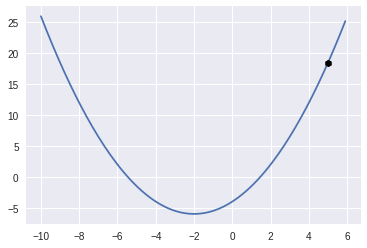

In [112]:
#CODIGO BASE

tf.reset_default_graph()

a, b, c, x_ini = (0.5, 2, -4, 5.0)

starting_val = tf.placeholder(tf.float64, shape=[])
x = tf.Variable(starting_val)
y = a*x**2 + b*x + c

num_steps = 20
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])

learning_rate = 0.0

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(y)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val:x_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        sess.run(train_op)

tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
x_plt = np.arange(-10,6,0.1)
y_plt  = a*x_plt**2 + b*x_plt + c
plt.plot(x_plt, y_plt)
plt.plot(x_vals,y_vals,'--x')
plt.plot(5,18.5,'hk') #ponto inicial
plt.plot(x_vals[-1],y_vals[-1],'hk') #ponto final
plt.show()

### Objetivo dos exemplos
Aprender a usar o parâmetro `Learning_rate` do otimizador `tf.train.GradientDescentOptimizer`.

### Exe. 1

* Tomando como referência o codigo do caso de estudo, ENCONTRE e imprima o valor do *learning rate* (taxa de aprendizado) para que haja convergência, sem que $x$ ultrapasse do mínimo ("sem overshoot"). 
* Para o *learning rate* ACHADO, plote os valores de $x$ e $y$ no processo iterativo. 

0.45
[ 5.          1.85000008  0.11750009 -0.83537492 -1.35945619 -1.6477009
 -1.80623549 -1.89342952 -1.94138623 -1.96776243 -1.98226933 -1.99024813
 -1.99463647 -1.99705006 -1.99837753 -1.99910764 -1.9995092  -1.99973006
 -1.99985153 -1.99991834]
[18.5         1.41125032 -3.75809668 -5.32182422 -5.79485182 -5.93794267
 -5.98122766 -5.99432137 -5.99828221 -5.99948037 -5.99984281 -5.99995245
 -5.99998562 -5.99999565 -5.99999868 -5.9999996  -5.99999988 -5.99999996
 -5.99999999 -6.        ]


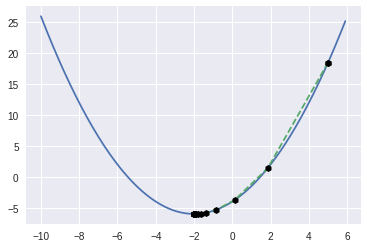

In [113]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()

a, b, c, x_ini = (0.5, 2, -4, 5.0) #1.4641016151377544

starting_val = tf.placeholder(tf.float64, shape=[])
x = tf.Variable(starting_val)
y = a*x**2 + b*x + c

num_steps = 20
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])

learning_rate = 0.45

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(y)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val:x_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()

        sess.run(train_op)


print(learning_rate)
print(x_vals)
print(y_vals)

tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
x_plt = np.arange(-10,6,0.1)
y_plt  = a*x_plt**2 + b*x_plt + c
plt.plot(x_plt, y_plt)
plt.plot(x_vals,y_vals,'--x')
plt.plot(5,18.5,'hk') #ponto inicial
plt.plot(x_vals,y_vals,'hk') #ponto final
plt.show()

### Exe. 2

* Tomando como referência o codigo do caso de estudo, ENCONTRE e imprima o valor do *learning rate* (taxa de aprendizado) para que haja convergência. 
  * Neste caso, $x$ deve ultrapassar o valor mínimo (**com overshoot**. Aqui, haverá um zigue-zague em torno do mínimo). 
* Para o *learning rate* ACHADO, plote os valores de $x$ e $y$ no processo iterativo.**bold text**

1.7
[ 5.         -6.90000033  1.43000047 -4.40100049 -0.31929954 -3.1764904
 -1.17645666 -2.57648037 -1.59646371 -2.28247542 -1.80226719 -2.13841298
 -1.90311091 -2.06782237 -1.95252434 -2.03323296 -1.97673692 -2.01628415
 -1.98860109 -2.00797924]
[18.5         6.00500164 -0.1175484  -3.11759832 -4.58762299 -5.30793517
 -5.66088819 -5.83383519 -5.91857923 -5.96010382 -5.98045087 -5.99042092
 -5.99530625 -5.99770006 -5.99887303 -5.99944779 -5.99972941 -5.99986741
 -5.99993503 -5.99996817]


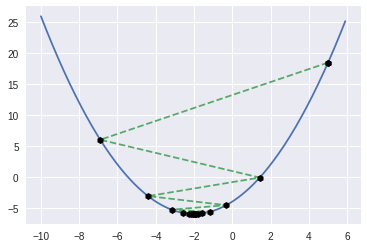

In [114]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()

a, b, c, x_ini = (0.5, 2, -4, 5.0) #1.4641016151377544

starting_val = tf.placeholder(tf.float64, shape=[])
x = tf.Variable(starting_val)
y = a*x**2 + b*x + c

num_steps = 20
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])

learning_rate = 1.7

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(y)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val:x_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()

        sess.run(train_op)


print(learning_rate)
print(x_vals)
print(y_vals)
tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
x_plt = np.arange(-10,6,0.1)
y_plt  = a*x_plt**2 + b*x_plt + c
plt.plot(x_plt, y_plt)
plt.plot(x_vals,y_vals,'--x')
plt.plot(5,18.5,'hk') #ponto inicial
plt.plot(x_vals,y_vals,'hk') #ponto final
plt.show()

### Exe. 3

* Tomando como referência o codigo do caso de estudo, ENCONTRE e imprima o valor do *learning rate* (taxa de aprendizado) para que haja divergência (ache o menor valor que conseguir para que haja divergência). 
  * Neste caso, $x$ não convergira para o valor mínimo. 
* Para o *learning rate* ACHADO, plote os valores de $x$ e $y$ no processo iterativo.

2.05
[  5.          -9.34999967   5.7174993  -10.1033739    6.5085422
 -10.93396891   7.38066693 -11.84969983   8.34218435 -12.85929307
   9.40225721 -13.97236953  10.57098743 -15.1995362   11.85951238
 -16.55248734  13.28011102 -18.04411584  14.84632087 -19.68863611]
[ 18.5         21.01124755  23.77989772  26.83233425  30.19764522
  33.90790023  37.99845601  42.50829335  47.48038856  52.96212303
  59.00573473  65.66881603  73.0148625   81.113878    90.04304177
  99.88744393 110.74089633 122.70682651 135.89926334 150.44392363]


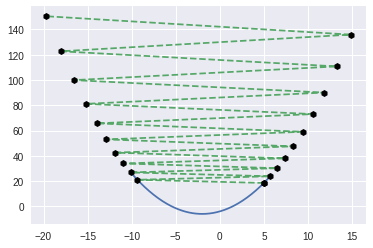

In [115]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.reset_default_graph()

a, b, c, x_ini = (0.5, 2, -4, 5.0) #1.4641016151377544

starting_val = tf.placeholder(tf.float64, shape=[])
x = tf.Variable(starting_val)
y = a*x**2 + b*x + c

num_steps = 20
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])

learning_rate = 2.05

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(y)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val:x_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()

        sess.run(train_op)


print(learning_rate)
print(x_vals)
print(y_vals)
tf.summary.FileWriter('logs', tf.get_default_graph()).close()

x_plt = np.arange(-10,6,0.1)
y_plt  = a*x_plt**2 + b*x_plt + c
plt.plot(x_plt, y_plt)
plt.plot(x_vals,y_vals,'--x')
plt.plot(5,18.5,'hk') #ponto inicial
plt.plot(x_vals,y_vals,'hk') #ponto final
plt.show()

### Exe. 4

Para as seguintes funções definidas pelas expressões:
$$
\begin{eqnarray}
f(x) &=& log(1+|x|^{2+sin(x)})\\
f(x) &=& (2+\frac{sin(50x)}{50})(\arctan(x)^2)\\
f(x) &=& |\lfloor x \rfloor  - 50|
\end{eqnarray}
$$
Tomando como referência o codigo do caso de estudo, ENCONTRE O VALOR MINIMO para cada função usando alguns dos otimizadores de tensorflow.

**OBS**. Para ver uma animação das diferentes funções a otimizar ver: [An Interactive Tutorial on Numerical Optimization](https://www.benfrederickson.com/numerical-optimization/)

0.5
2.955338079501769e-16
0.0


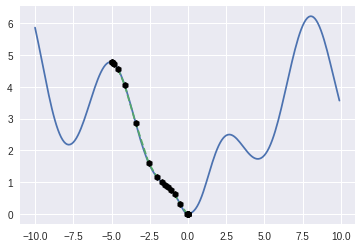

0.5
-0.11326485748031734
0.025588356511139


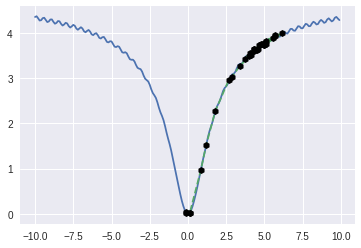

2.5
50.0
0.0


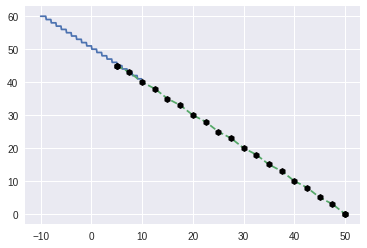

In [116]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

'''
Função 1
'''
tf.reset_default_graph()

x_ini = -5

starting_val = tf.placeholder(tf.float64, shape=[])
x = tf.Variable(starting_val)
y = tf.log(1 + tf.pow(tf.abs(x), 2+tf.sin(x)))

num_steps = 20
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])

learning_rate = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(y)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val:x_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()

        sess.run(train_op)


print(learning_rate)
print(x_vals[-1])
print(y_vals[-1])
tf.summary.FileWriter('logs', tf.get_default_graph()).close()

x_plt = np.arange(-10,10,0.1)
y_plt  = np.log(1 + np.abs(x_plt)**(2+np.sin(x_plt)))
plt.plot(x_plt, y_plt)
plt.plot(x_vals,y_vals,'--x')
plt.plot(x_vals[0],y_vals[0],'hk') #ponto inicial
plt.plot(x_vals,y_vals,'hk') #ponto final
plt.show()

'''
Função 2
'''

tf.reset_default_graph()

x_ini = 5

starting_val = tf.placeholder(tf.float64, shape=[])
x = tf.Variable(starting_val)
y = (2 + (tf.sin(50*x)/50))*tf.pow(tf.atan(x),2)

num_steps = 30
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])

learning_rate = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(y)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val:x_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()

        sess.run(train_op)


print(learning_rate)
print(x_vals[-1])
print(y_vals[-1])
tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
x_plt = np.arange(-10,10,0.1)
y_plt  = (2 + (np.sin(50*x_plt)/50))*(np.arctan(x_plt)**2)
plt.plot(x_plt, y_plt)
plt.plot(x_vals,y_vals,'--x')
plt.plot(x_vals[0],y_vals[0],'hk') #ponto inicial
plt.plot(x_vals,y_vals,'hk') #ponto final
plt.show()

'''
Função 3
'''

tf.reset_default_graph()

x_ini = 5

starting_val = tf.placeholder(tf.float64, shape=[])
x = tf.Variable(starting_val)
with tf.get_default_graph().gradient_override_map({"Floor": "Identity"}):
    y = tf.abs(tf.floor(x)-50)

num_steps = 20
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])

learning_rate = 2.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(y)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val:x_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()

        sess.run(train_op)


print(learning_rate)
print(x_vals[-1])
print(y_vals[-1])
tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
x_plt = np.arange(-10,10,0.1)
y_plt  = abs(np.floor(x_plt) - 50)
plt.plot(x_plt, y_plt)
plt.plot(x_vals,y_vals,'--x')
plt.plot(x_vals[0],y_vals[0],'hk') #ponto inicial
plt.plot(x_vals,y_vals,'hk') #ponto final
plt.show()

## Exercícios de otimização 2D

### Caso de estudo

O seguinte codigo permite aplicar o algoritmo GSD via o otimizador de gradiente descendente (`tf.train.GradientDescentOptimizer`) para achar o mínimo de uma função de Zakharov: 
$$
f(x,y) = (x^2 + y^2) + (0.5x + y)^2 + (0.5x + y)^4
$$

considerando que o valor inicial é:
$$
(x_{ini},y_{ini}) = (8.0,8.0)
$$

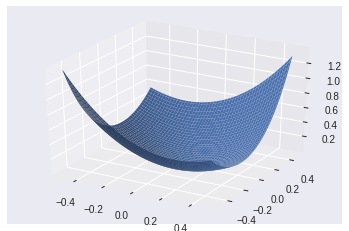

In [117]:
def zakharov(x, y):
  return (x**2 + y**2) + (0.5*x + y)**2 + (0.5*x + y)**4

x = np.arange(-0.5, 0.5, 0.01)
y = np.arange(-0.5, 0.5, 0.01)
X, Y = np.meshgrid(x, y)
Z = zakharov(X, Y)

fig = plt.figure(1)
ax = fig.gca(projection = '3d')
# Plot the surface.
surf5 = ax.plot_surface(X, Y, Z)
plt.show()

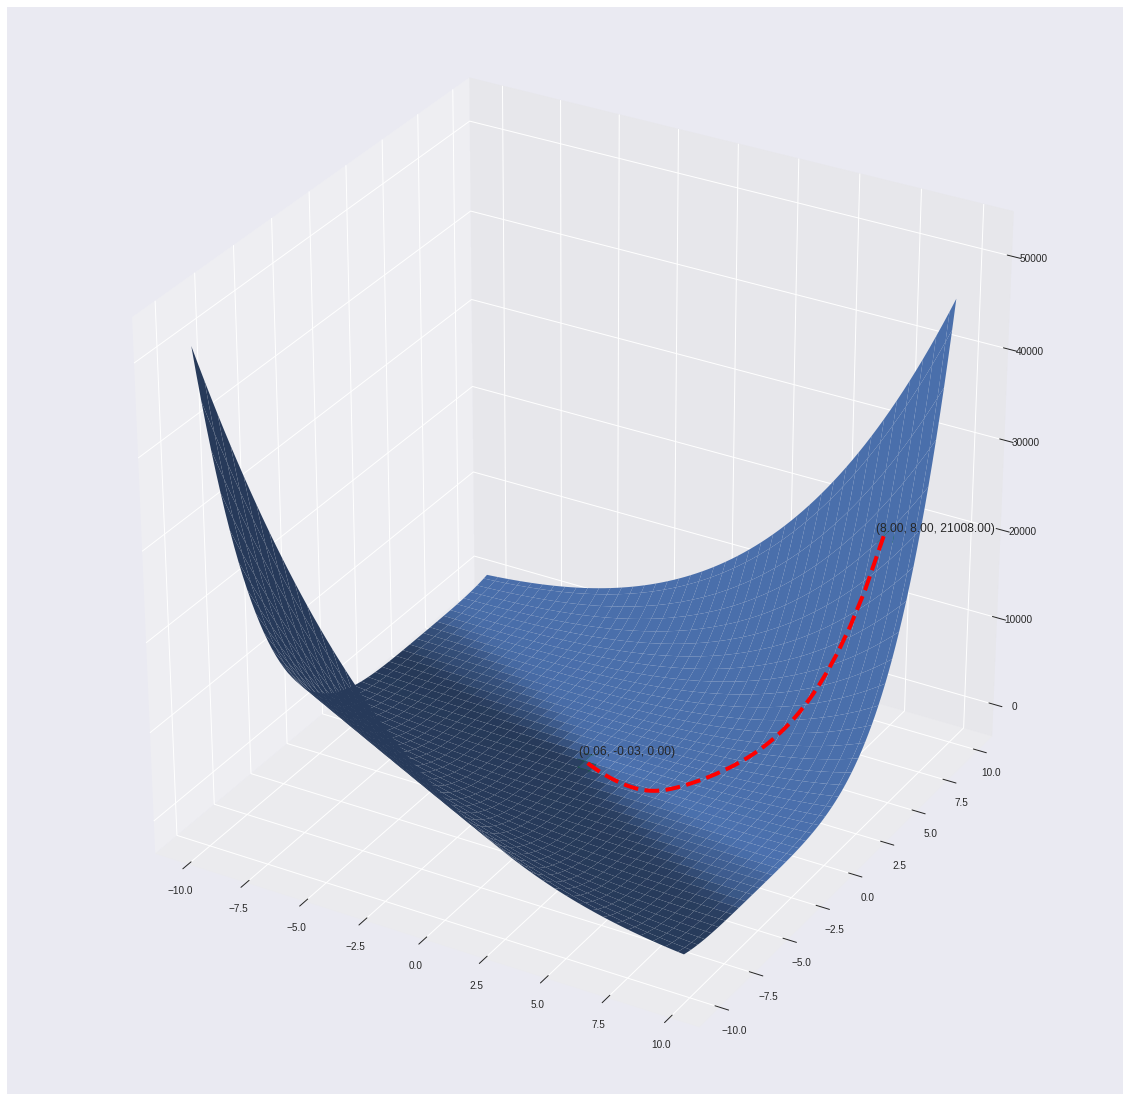

In [118]:
tf.reset_default_graph()

x_ini, y_ini = (8.0, 8.0)
z_ini = zakharov(x_ini, y_ini)


# zakharov's function
starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.add_n([tf.add(tf.square(x), tf.square(y)), tf.square(tf.add(tf.multiply(0.5, x), y)), tf.pow(tf.add(tf.multiply(0.5, x),y), 4.)])



num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.0001

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
#         print(z_vals[i])
        sess.run(train_op)
        

tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = zakharov(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]+300),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]), fontsize=12)
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]+600),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]), fontsize=12)
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

### Exe. 1




Para as seguintes funções definidas pelas expressões:

$$
\begin{eqnarray}
f(x,y) &=& (x^2 + y -11)^2 + (x + y^2 -7)^2\\
f(x,y) &=& x^2 + y^2 +x\sin(y) +y\sin(x) \\
f(x,y) &=& (1-x)^2 + 100(y-x^2)^2 \\
f(x,y) &=& 0.26(x^2 + y^2) + 0.48xy \\
f(x,y) &=& x^2 + 2*y^2 - 0.3*\cos(3 \pi x) - 0.4\cos(4 \pi y) + 0.7\\
f(x,y) &=& (x-1)^2 + (y-1)^2 - xy
\end{eqnarray}
$$

Tomando como referência o codigo do caso de estudo, ENCONTRE O VALOR MINIMO para cada função usando alguns dos otimizadores de tensorflow.

**OBS**. Para ver uma animação das diferentes funções a otimizar ver: [An Interactive Tutorial on Numerical Optimization](https://www.benfrederickson.com/numerical-optimization/)

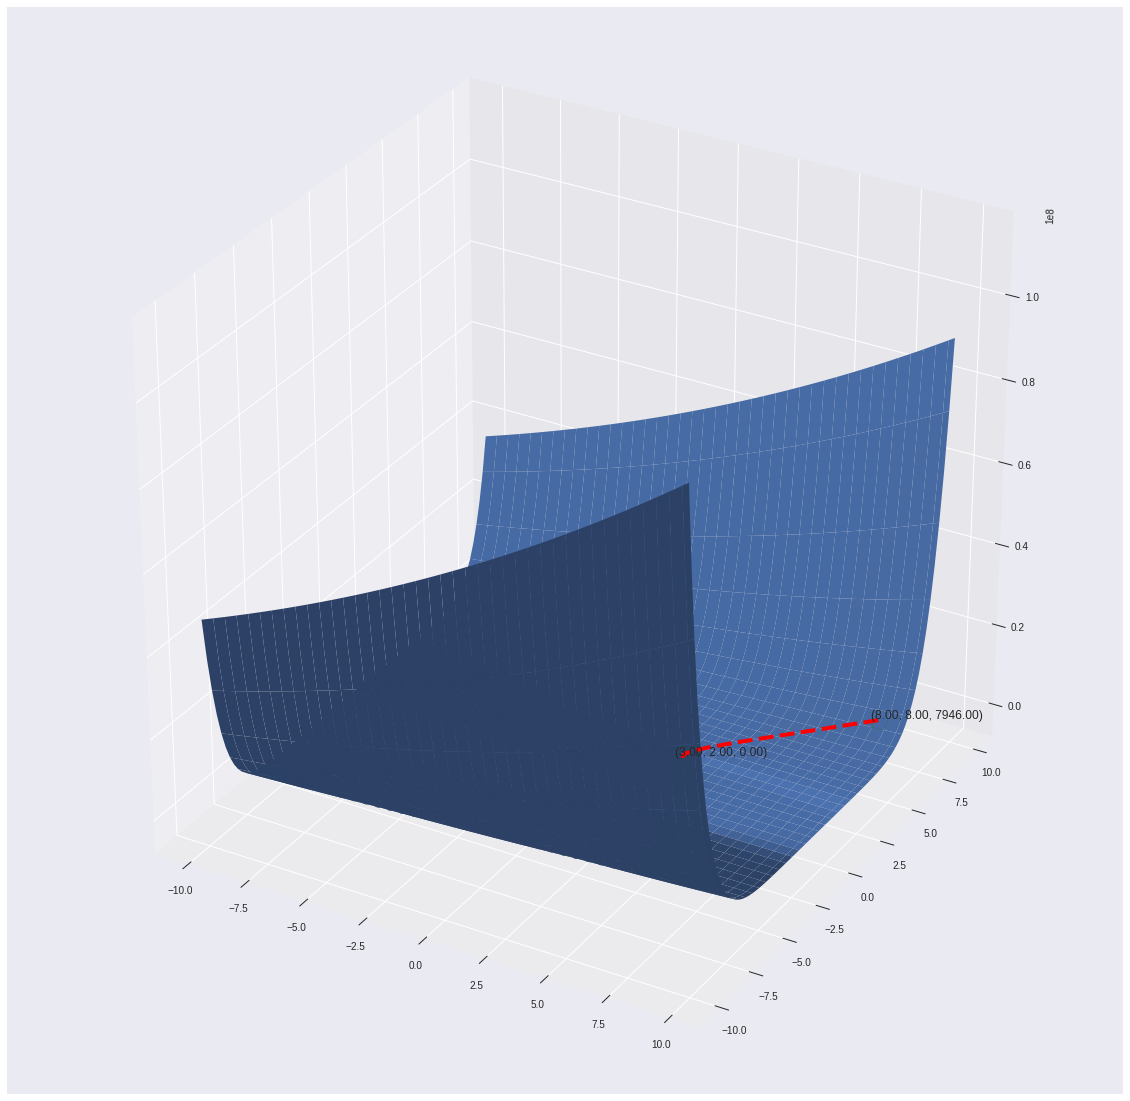

In [119]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def F1(x, y):
  return (x**2 + y - 11)**2 + (x + y**2 -7 )**4

tf.reset_default_graph()

x_ini, y_ini = (8.0, 8.0)
z_ini = F1(x_ini, y_ini)

starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.add(tf.square(tf.add(tf.square(x), tf.subtract(y,11))),tf.square(tf.add(x,tf.subtract(tf.square(y),7))))

num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.0001

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
        sess.run(train_op)     

tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = F1(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]), fontsize=12)
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]), fontsize=12)
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

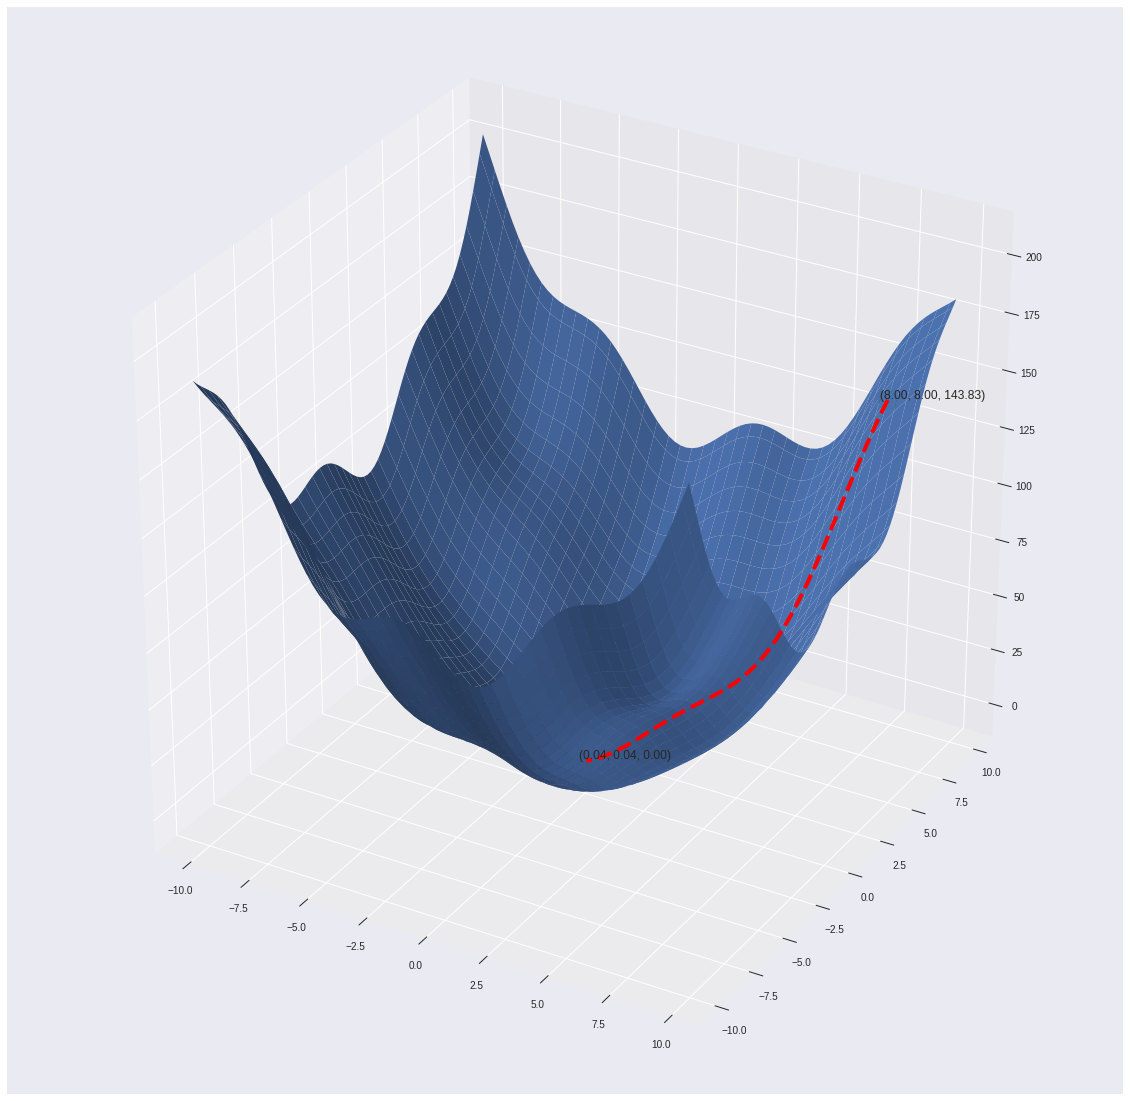

In [120]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


tf.reset_default_graph()

def F2(x, y):
  return x**2 + y**2 + x*np.sin(y) + y*np.sin(x)

x_ini, y_ini = (8.0, 8.0)
z_ini = F2(x_ini, y_ini)

starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.add_n([tf.square(x), tf.square(y), tf.multiply(x, tf.sin(y)), tf.multiply(y, tf.sin(x))])

num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.0001

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
        
        sess.run(train_op)     


tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = F2(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]), fontsize=12)
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]), fontsize=12)
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

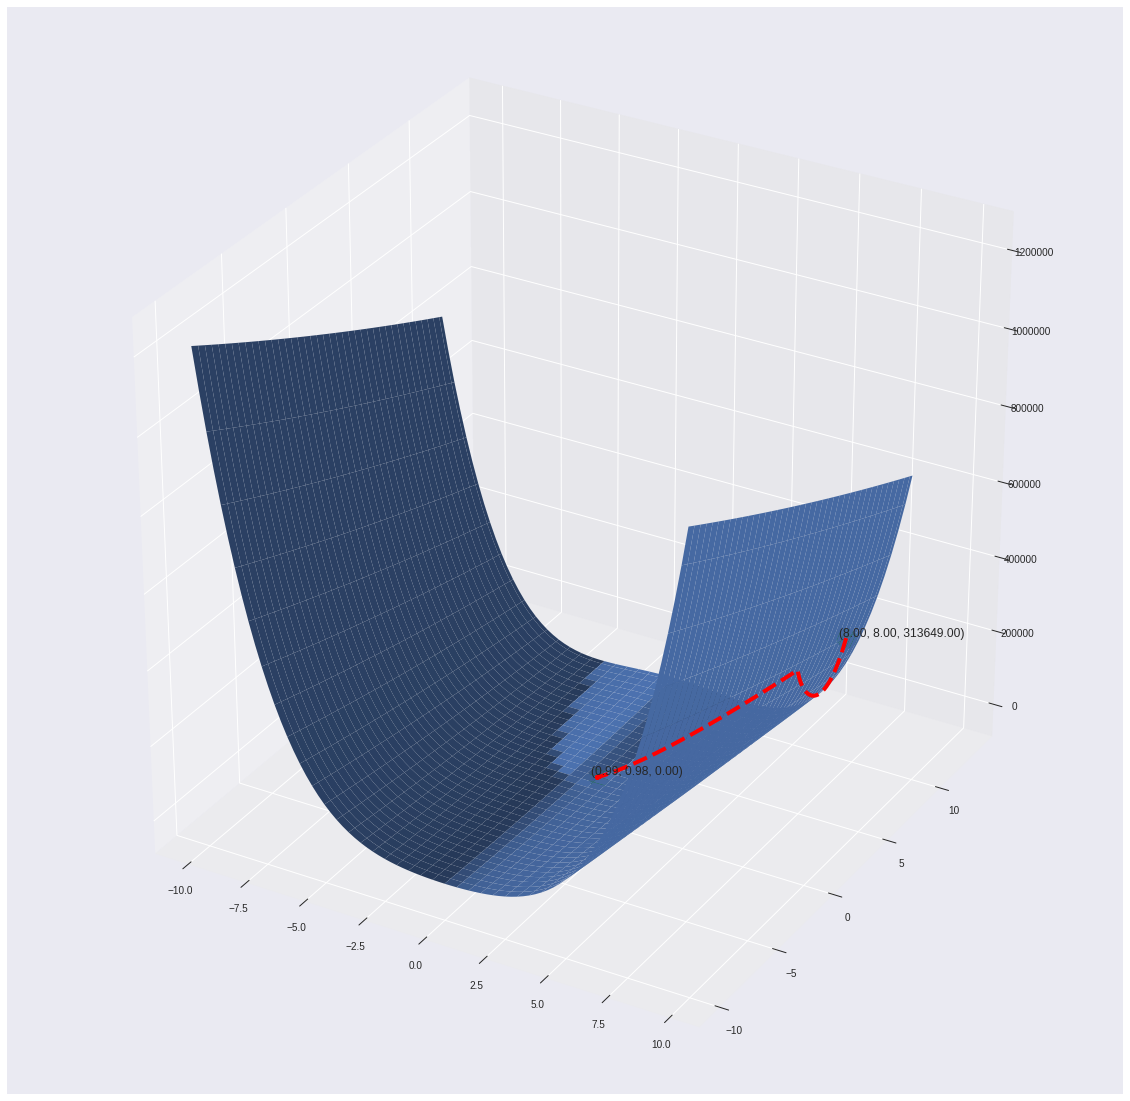

In [121]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


tf.reset_default_graph()

def F3(x, y):
  return (1-x)**2 + 100*((y-(x**2))**2)

x_ini, y_ini = (8.0, 8.0)
z_ini = F3(x_ini, y_ini)

starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.add(tf.square(1-x), 100*tf.square(tf.subtract(y, tf.square(x))))

num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.05

optimizer = tf.train.AdamOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
        
        sess.run(train_op)     


tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = F3(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]), fontsize=12)
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]), fontsize=12)
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

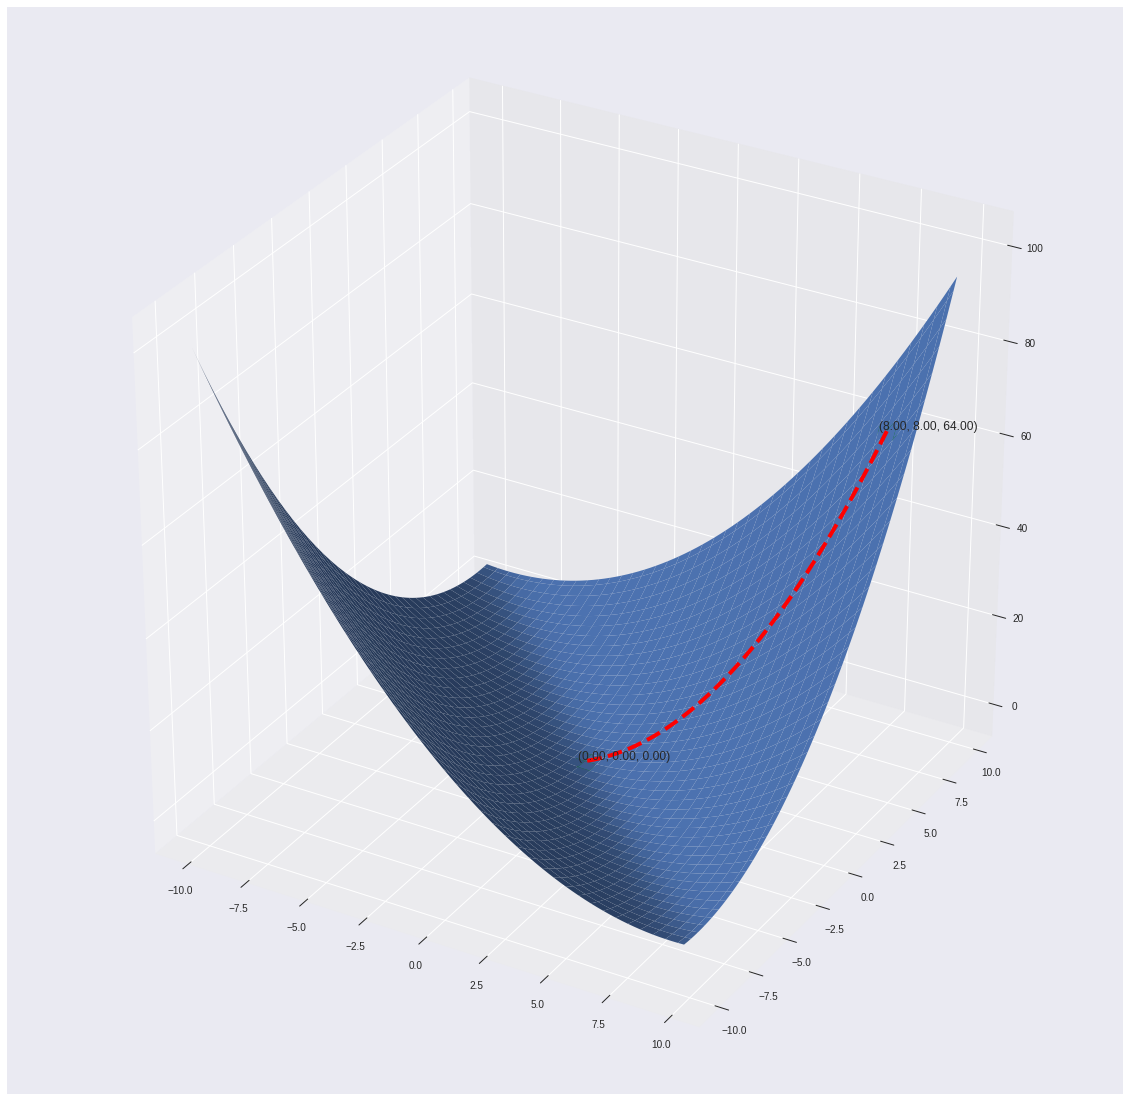

In [122]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


tf.reset_default_graph()

def F4(x, y):
  return 0.26*(x**2+y**2)+0.48*x*y

x_ini, y_ini = (8.0, 8.0)
z_ini = F4(x_ini, y_ini)

starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.add(tf.multiply(0.26,tf.add(tf.square(x), tf.square(y))), tf.multiply(0.48, tf.multiply(x,y)))

num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.0005

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
        
        sess.run(train_op)     


tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = F4(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]), fontsize=12)
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]), fontsize=12)
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

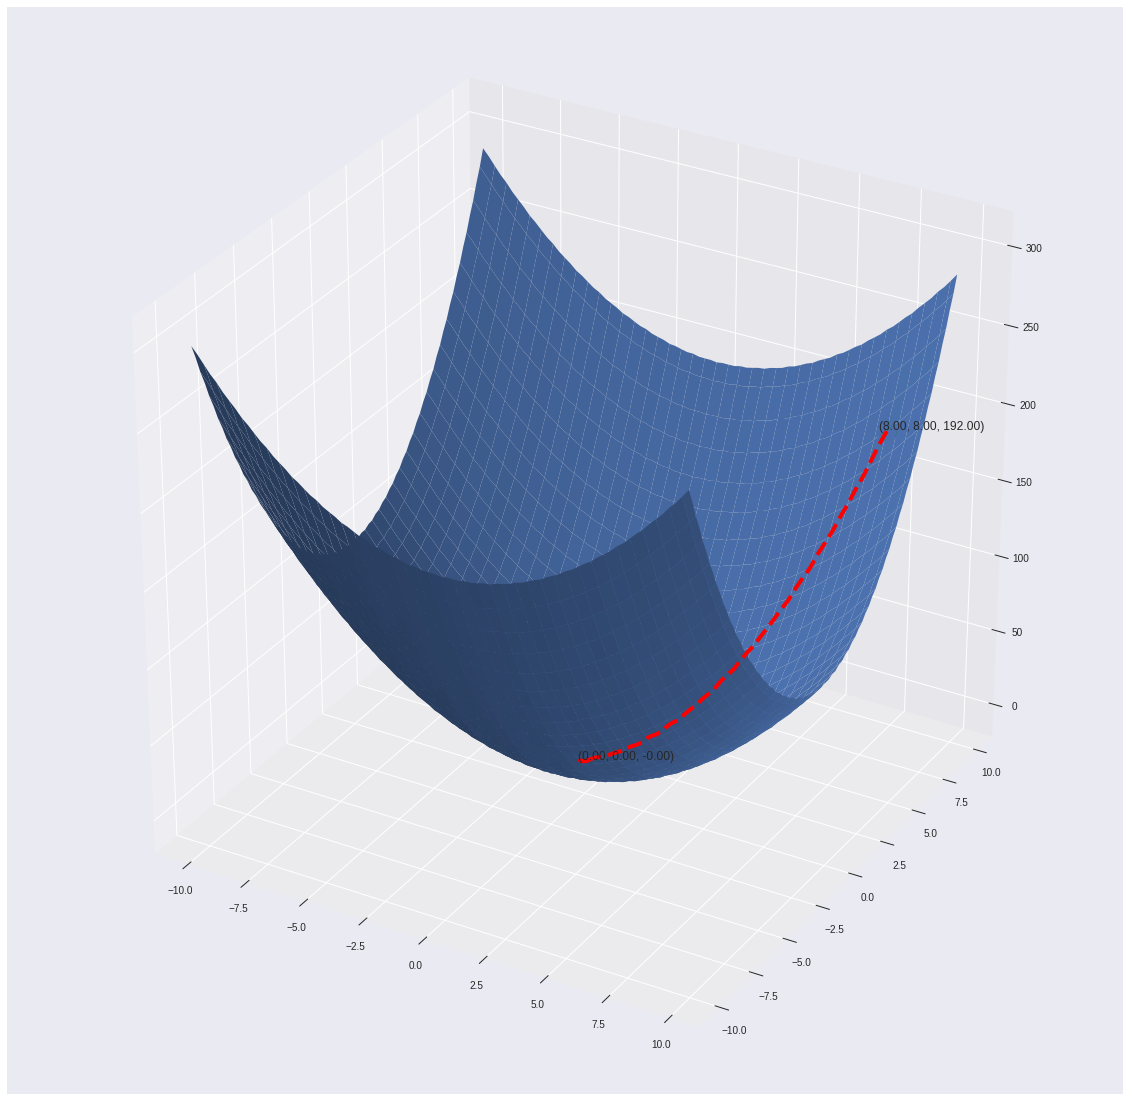

In [123]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


tf.reset_default_graph()

def F5(x, y):
  return x**2+2*(y**2)-0.3*np.cos(3*math.pi*x)-0.4*np.cos(4*math.pi*y)+0.7

x_ini, y_ini = (8.0, 8.0)
z_ini = F5(x_ini, y_ini)

starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
pi = tf. constant(math.pi)
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.add_n([tf.square(x), tf.multiply(2., tf.square(y)), tf.multiply(-0.3, tf.cos(tf.multiply(3.,tf.multiply(pi,x)))), tf.multiply(-0.4, tf.cos(tf.multiply(4.,tf.multiply(pi,y)))), 0.7])

num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.2

#optimizer = tf.train.MomentumOptimizer(learning_rate, 0.001)
optimizer = tf.train.AdamOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
        
        sess.run(train_op)     


tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = F5(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]), fontsize=12)
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]), fontsize=12)
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

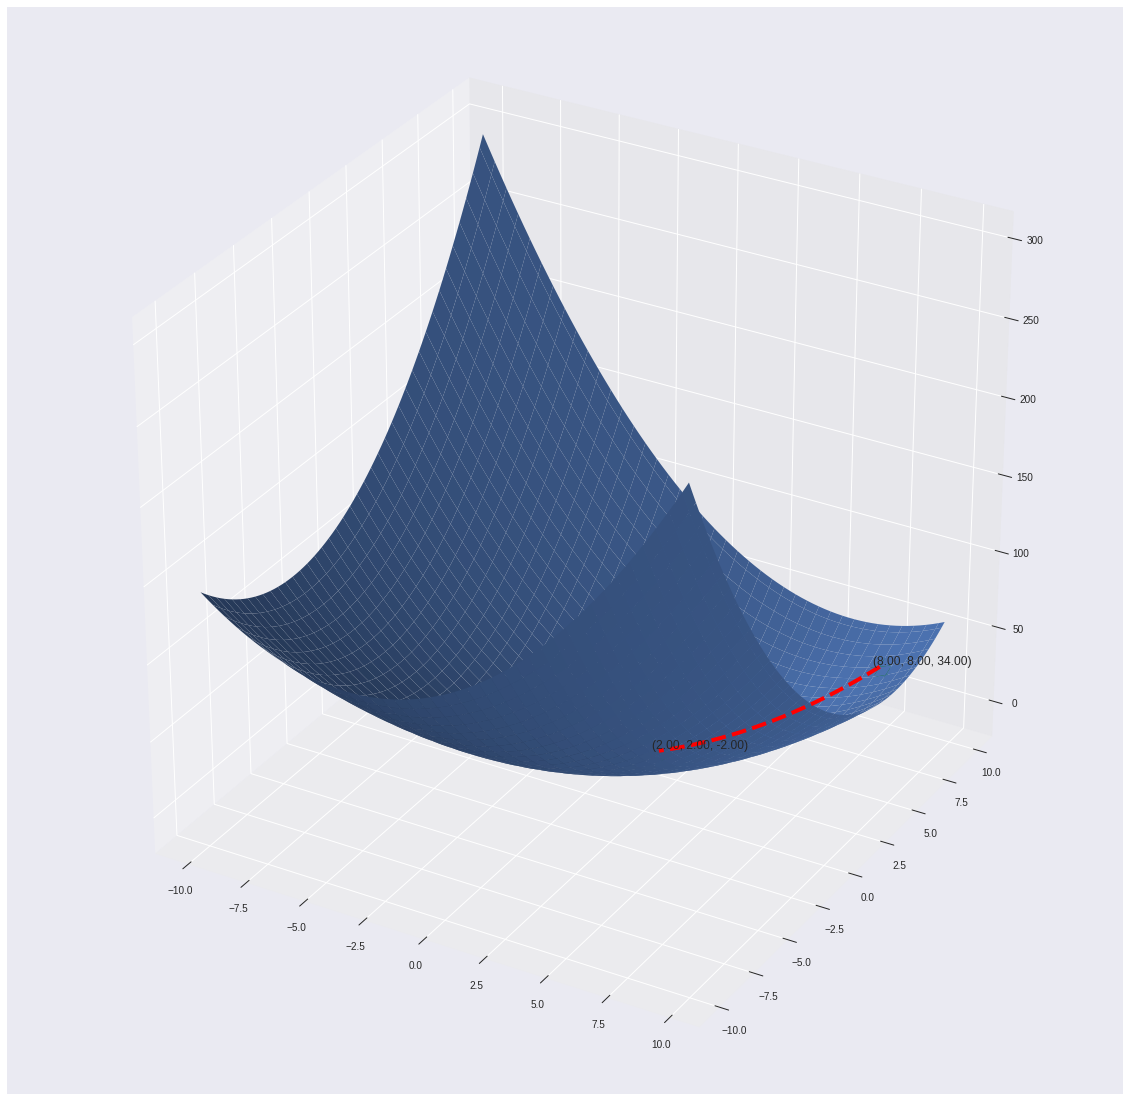

In [124]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


tf.reset_default_graph()

def F6(x, y):
  return (x-1)**2 + (y-1)**2 - x*y

x_ini, y_ini = (8.0, 8.0)
z_ini = F5(x_ini, y_ini)

starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
pi = tf. constant(math.pi)
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.subtract(tf.add(tf.square(tf.subtract(x,1)), tf.square(tf.subtract(y, 1))), tf.multiply(x,y))

num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.001

optimizer = tf.train.RMSPropOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
        sess.run(train_op)

tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = F6(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]), fontsize=12)
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]), fontsize=12)
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

### Exe. 2

Para a seguinte função:
$$
f(x,y) = \exp{\left(-\frac{1}{0.1x^2 + y^2}\right)}
$$
Determinar seu minimo valor usando SGD. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


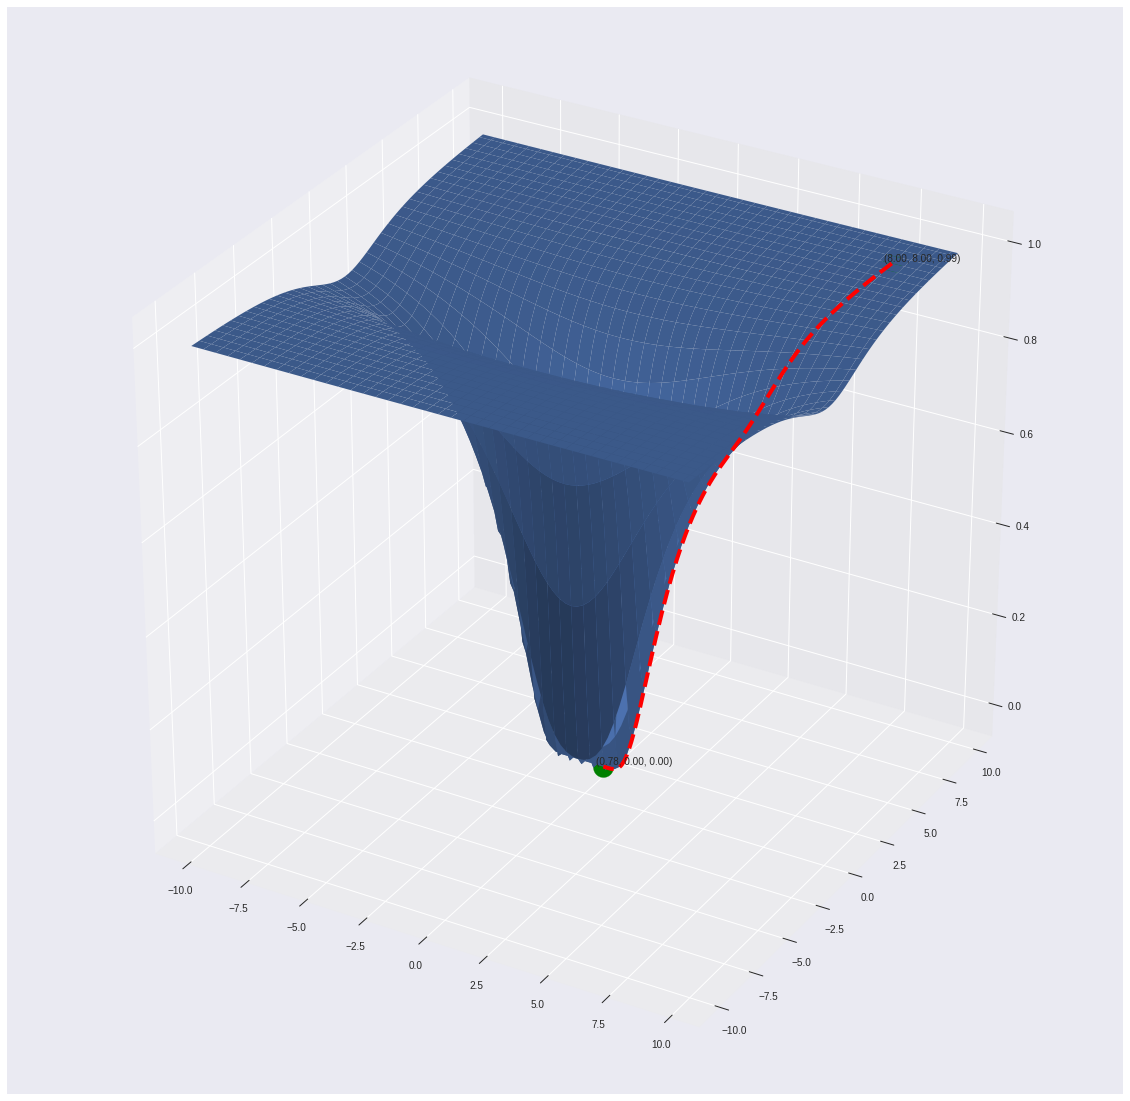

In [173]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

tf.reset_default_graph()

def equation(x, y):
  return np.exp(-1./(0.1*(x**2) + (y**2)))

x_ini, y_ini = (8.0, 8.0)
z_ini = equation(x_ini, y_ini)

starting_val_x = tf.placeholder(tf.float32, shape=[])
starting_val_y = tf.placeholder(tf.float32, shape=[])
x = tf.Variable(starting_val_x)
y = tf.Variable(starting_val_y)
z = tf.exp(tf.div(-1., tf.add(tf.multiply(0.1, tf.square(x)), tf.square(y))))

num_steps = 20000
x_vals = np.empty([num_steps])
y_vals = np.empty([num_steps])
z_vals = np.empty([num_steps])

learning_rate = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op  = optimizer.minimize(z)
init_op   = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op, feed_dict={starting_val_x:x_ini,starting_val_y:y_ini})
    for i in range(num_steps):
        x_vals[i] = x.eval()
        y_vals[i] = y.eval()
        z_vals[i] = z.eval()
        sess.run(train_op)     

tf.summary.FileWriter('logs', tf.get_default_graph()).close()

#Funções de plot
xmin, xmax = -10, 10
ymin, ymax = -10, 10
x_plt = np.arange(xmin, xmax, 0.25)
y_plt = np.arange(ymin, ymax, 0.25)
X_plt, Y_plt = np.meshgrid(x_plt, y_plt)
Z_plt = equation(X_plt, Y_plt)

fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection = '3d')
# Plot the surface.
ax.plot_surface(X_plt, Y_plt, Z_plt)
ax.plot3D(x_vals,y_vals,z_vals,'--x', linewidth=4.0, color='r')
ax.text(x_vals[0]-0.3,y_vals[0],(z_vals[0]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[0],y_vals[0],z_vals[0]))
ax.scatter3D(x_vals[0],y_vals[0],z_vals[0],s = 400, color='g') #ponto inicial
ax.text(x_vals[-1]-0.3,y_vals[-1],(z_vals[-1]),  "({:.2f}, {:.2f}, {:.2f})".format(x_vals[-1],y_vals[-1],z_vals[-1]))
ax.scatter3D(x_vals[-1],y_vals[-1],z_vals[-1],s = 400, color='g') #ponto final
#ax.view_init(elev=20., azim=-35)
plt.show()

## Projeto - Regressão Linear 
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

### TEORIA

#### Problema da regressão linear

Seja o conjunto de treinamento:
$$
\Im  = \left\{ {({x_1},{y_1}),({x_2},{y_2}), \cdots ,({x_N},{y_N})} \right\}
$$

Supomos que: existe uma relação linear entre todo  $x$ e $y$, pode-se expressar essa relação em forma matricial como: 
$$ 
y= Xw
$$
Onde:
* $y$: o vetor que contem todos as respostas do conjunto de treinamento.
$$
y = \left[y_1,\cdots,y_i,\cdots,y_N\right]^T  \in \RR^{N \times 1}
$$
* $X \in \RR^{N \times p}$: é a matriz cujas linhas armazenam as observações $x_i \in \RR^p$.


Já que $N > p$, este é um sistema de **sobre-determinado**, que pode resolvido no sentido dos mínimos quadrados
$$ 
\umin{ w }  \norm{Xw-y}^2 
$$

Tal problema de otimização tem como **SOLUÇÃO FECHADA** a seguinte equação, que faz usso da [pseudo-inversa de Moore-Penrose](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)
$$ 
w = (X^\top X)^{-1} X^\top y 
$$

### PRATICA

### Determinando o modelo de regressão de um conjunto de dados aleatorios

Usando `NumPy`, geramos 300 pontos aleatórios ao redor da equação $y = 0.22x + 0.78$:

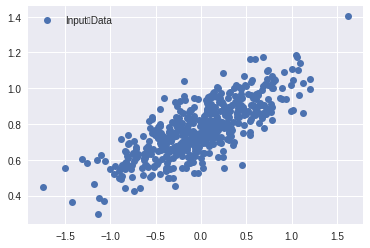

In [126]:
number_of_points = 500
x_point	=	[]
y_point	=	[]
a	=	0.22
b	=	0.78
for	i	in	range(number_of_points):
  x	=	np.random.normal(0.0,0.5)
  y	=	a*x	+	b	+np.random.normal(0.0,0.1)
  x_point.append([x])
  y_point.append([y])
    
plt.plot(x_point,y_point,	'o',	label='Input	Data')
plt.legend()
plt.show()

#### Exe. 1

Usando a  [pseudo-inversa de Moore-Penrose](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse)  determine o modelo linear de regressão do conjunto de dados 2D gerados inicialmente. Grafique a curva de regressão sobre o conjunto de dados.

[[0.77623157]
 [0.23516974]]


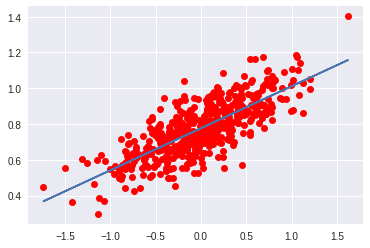

In [127]:
import tensorflow as tf
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

tf.reset_default_graph()


x_bias = np.concatenate([np.ones((number_of_points,1)), np.array(x_point)], axis=1)

w_bias = np.dot(np.linalg.pinv(x_bias), y_point)


print(w_bias)
plt.plot(x_point, y_point, 'ro')
plt.plot(x_point, (w_bias[1]*x_point)+w_bias[0])
plt.show()


#### Exe. 2

Usando SGD determine o modelo linear de regressão do conjunto de dados 2D gerados inicialmente. . Grafique a curva de regressão sobre o conjunto de dados.

99 [0.23516972] [0.7762316] 0.009802423


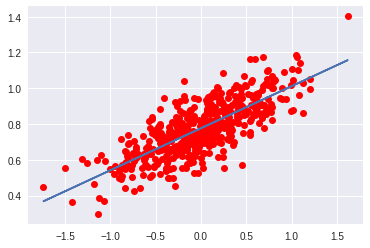

In [128]:
import tensorflow as tf
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

tf.reset_default_graph()

x_data = tf.convert_to_tensor(x_point, dtype=np.float32)
y_data = tf.convert_to_tensor(y_point, dtype=np.float32)

w = tf.Variable(tf.random_uniform([1], -1., 1.))
b = tf.Variable(tf.zeros([1]))
y = tf.add(b, tf.multiply(x_data, w))
                
loss = tf.reduce_mean(tf.square(y - y_data))

learning_rate = 0.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(100):
        sess.run(train)
    print(step, sess.run(w), sess.run(b), sess.run(loss))

    plt.plot(sess.run(x_data), sess.run(y_data), 'ro')
    plt.plot(sess.run(x_data), sess.run(w) * sess.run(x_data) + sess.run(b))
    plt.show()

### Determinando o modelo de regressão sobre os dados do *Iris flower data set*

Usando `Sklearn`, cargamos o banco de dados [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

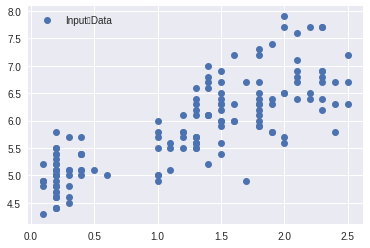

In [129]:
from sklearn import datasets

iris = datasets.load_iris()
x_point = np.array([x[3] for x in iris.data])
y_point = np.array([y[0] for y in iris.data])

plt.plot(x_point,y_point,	'o',	label='Input	Data')
plt.legend()
plt.show()

#### Exe. 1

Usando SGD determine o modelo linear de regressão do conjunto de dados 2D gerados apartir do *Iris flower data set*. 
* Os hiperparametros a usar para o GSD devem ser:
  * `learning_rate` = definido pelo usuario
  * `batch_size    = 25`
  *  `Epooch` = definido pelo usuario
* Grafique a curva de regressão sobre o conjunto de dados.

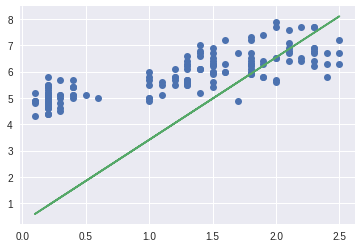

In [172]:
import tensorflow as tf
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

tf.reset_default_graph()

epochs = 500
batch_size = 25

item_idx = np.arange(0, np.shape(x_point)[0])

x_ = tf.placeholder(np.float32, [None], name="x_")
y_ = tf.placeholder(np.float32, [None], name="y_")
w = tf.Variable(tf.random_uniform([1], -1., 1.))
b = tf.Variable(tf.zeros([1]))
pred = tf.add(b, tf.multiply(x_, w))

loss = tf.reduce_mean(tf.abs(pred - y_))


learning_rate = 3.5

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    results = []
    # Training cycle
    for e_ in range(epochs):
        np.random.shuffle(item_idx)

        x_data = x_point[item_idx]
        y_data = y_point[item_idx]

        total_batch = int(sess.run(tf.shape(x_data))/batch_size)

        # Loop over all batches
        for i_ in range(total_batch):
            batch_x = x_data[i_*batch_size:(i_+1)*batch_size]
            batch_y = y_data[i_*batch_size:(i_+1)*batch_size]

            l_, _ = sess.run([loss, train], feed_dict={x_: batch_x, y_: batch_x})

            #print(l_, sess.run(w), sess.run(b))

            #plt.plot(batch_x, batch_y,	'o',	label='Input	Data')
            #plt.plot(batch_x, sess.run(w) * batch_x + sess.run(b))
            #plt.show()
            #print(e_, i_,  l_, sess.run(w), sess.run(b))

    plt.plot(x_point,y_point,	'o',	label='Input	Data')
    plt.plot(x_point, sess.run(w) * x_point + sess.run(b))
    plt.show()